In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eestech-challenge-2-local-round-xanthi/validation_set.csv
/kaggle/input/eestech-challenge-2-local-round-xanthi/training_set.csv


# Import Libraries 

In [2]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time
import datetime # manipulating date formats

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]
pandas version: 1.3.5
matplotlib version: 3.5.3
NumPy version: 1.21.6
SciPy version: 1.7.3
IPython version: 7.33.0
scikit-learn version: 1.0.2
-------------------------


# Load Data Modelling Libraries

In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

# Meet and Greet Data

In [4]:
#import data
data_raw = pd.read_csv('../input/eestech-challenge-2-local-round-xanthi/training_set.csv')

#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv('../input/eestech-challenge-2-local-round-xanthi/validation_set.csv')

#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]

#preview data

print("\n ----------Top-5- Record----------")
print(data_raw.head(5))  #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
# print(data_raw.tail(5)) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
# print(data_raw.sample(10)) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
print("\n -----------Information-----------")
print(data_raw.info())  #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
print("\n -----------Data Types-----------")
print(data_raw.dtypes)
print("\n ----------Missing value-----------")
print(data_raw.isnull().sum())
print("\n ----------Null value-----------")
print(data_raw.isna().sum())
print("\n ----------Shape of Data----------")
print(data_raw.shape)
print("\n ----------Number of duplicates----------")
print('Number of duplicates:', len(data_raw[data_raw.duplicated()]))

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_data = missing_values_table(data1)
print("\n ----------Missing values----------")
print(missing_values_data.head(30))

print("\n ----------Number of types----------")
# Number of each type of column
print(data1.dtypes.value_counts())

print("\n ----------Number of uniques----------")
# Let's now look at the number of unique entries in each of the object (categorical) columns.
print(data1.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

print("\n ----------Describe of tables----------")
print(data_raw.describe(include = 'all'))


#preview data again
print(data1.corr())


 ----------Top-5- Record----------
   AGE  WORKER-CLASS  EDUCATION  MARITAL-STATUS  OCCUPATION  PLACE-OF-BIRTH  \
0   65           NaN       15.0               1         NaN               6   
1   80           NaN       22.0               5         NaN               6   
2   72           NaN       21.0               3         NaN             233   
3   47           1.0       21.0               1        10.0              36   
4   25           NaN       16.0               1         NaN               6   

   RELATIONSHIP  WORK-HOURS  SEX  RACE    INCOME  
0             1         NaN    2     1    7800.0  
1             0         NaN    2     1   61300.0  
2             6         NaN    1     6   10800.0  
3             1        60.0    1     1  493000.0  
4            10         NaN    2     8       0.0  

 -----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297733 entries, 0 to 297732
Data columns (total 11 columns):
 #   Column          Non-Null Count 

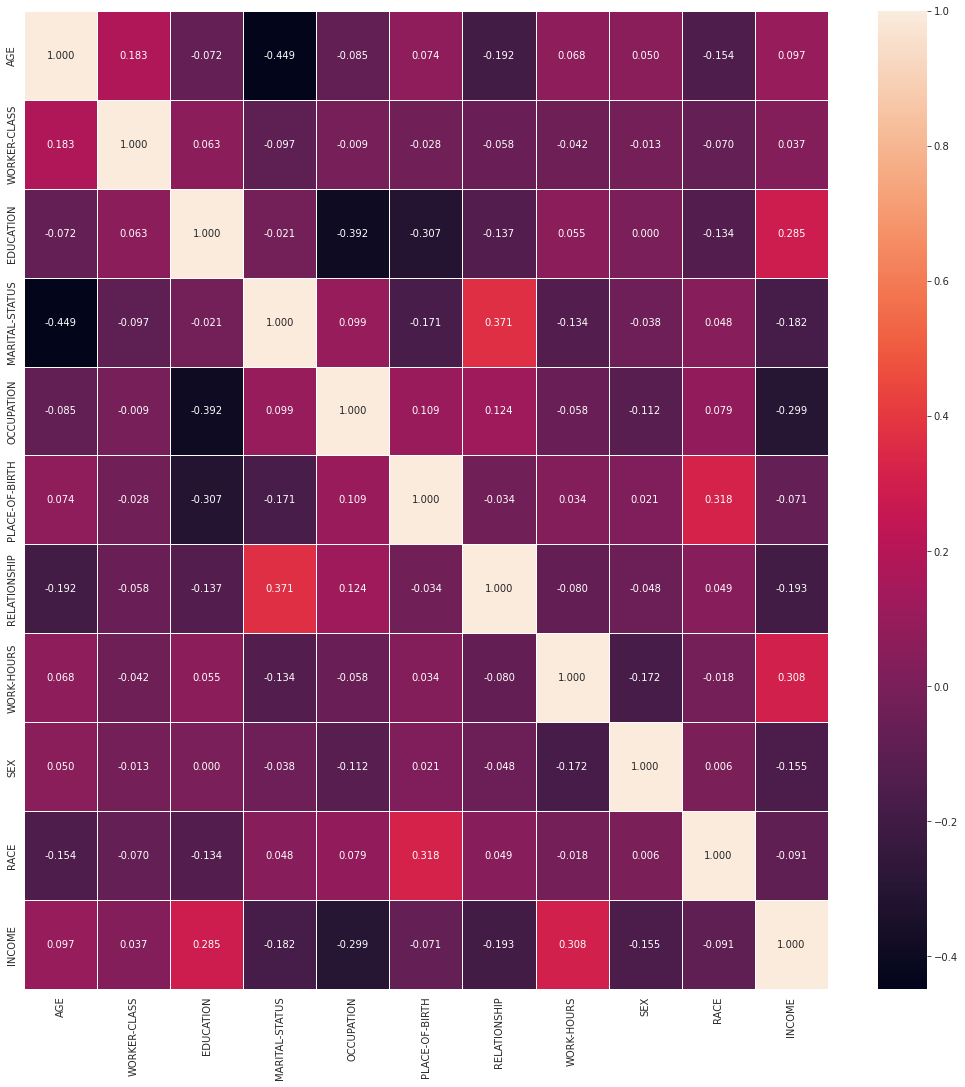

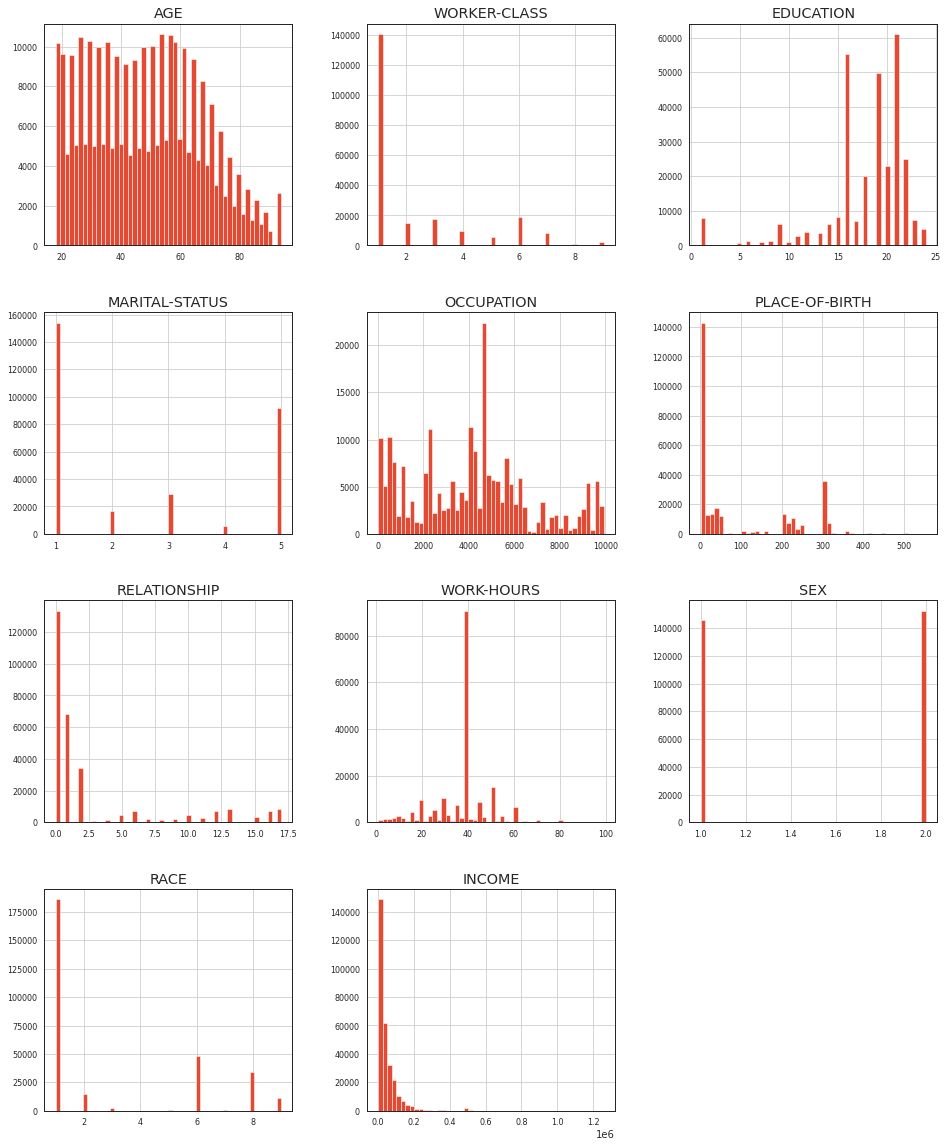

In [5]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data1.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)
plt.show()

data1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [6]:
#drop duplicates
data1.drop_duplicates(keep=False, inplace=True)

In [7]:
#replace other NaNs with mean
data1.fillna(data1.mean(), inplace=True)

In [8]:
#drop all NaNs
#data.dropna(inplace=True)

In [9]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler
scaler = RobustScaler()
normalize_data = scaler.fit_transform(data1)
print(normalize_data)
normalize_df = pd.DataFrame(normalize_data, columns = data1.columns)

[[ 0.53333333  0.17358085 -0.8        ...  0.          0.
  -0.41651032]
 [ 1.03333333  0.17358085  0.6        ...  0.          0.
   0.58724203]
 [ 0.76666667  0.17358085  0.4        ... -1.          1.
  -0.36022514]
 ...
 [-0.56666667  3.3056766  -0.6        ... -1.          1.4
  -0.18761726]
 [-0.76666667 -0.82641915 -0.2        ... -1.          0.
   0.18761726]
 [-0.73333333 -0.82641915 -0.6        ... -1.          0.2
   0.18761726]]


<AxesSubplot:>

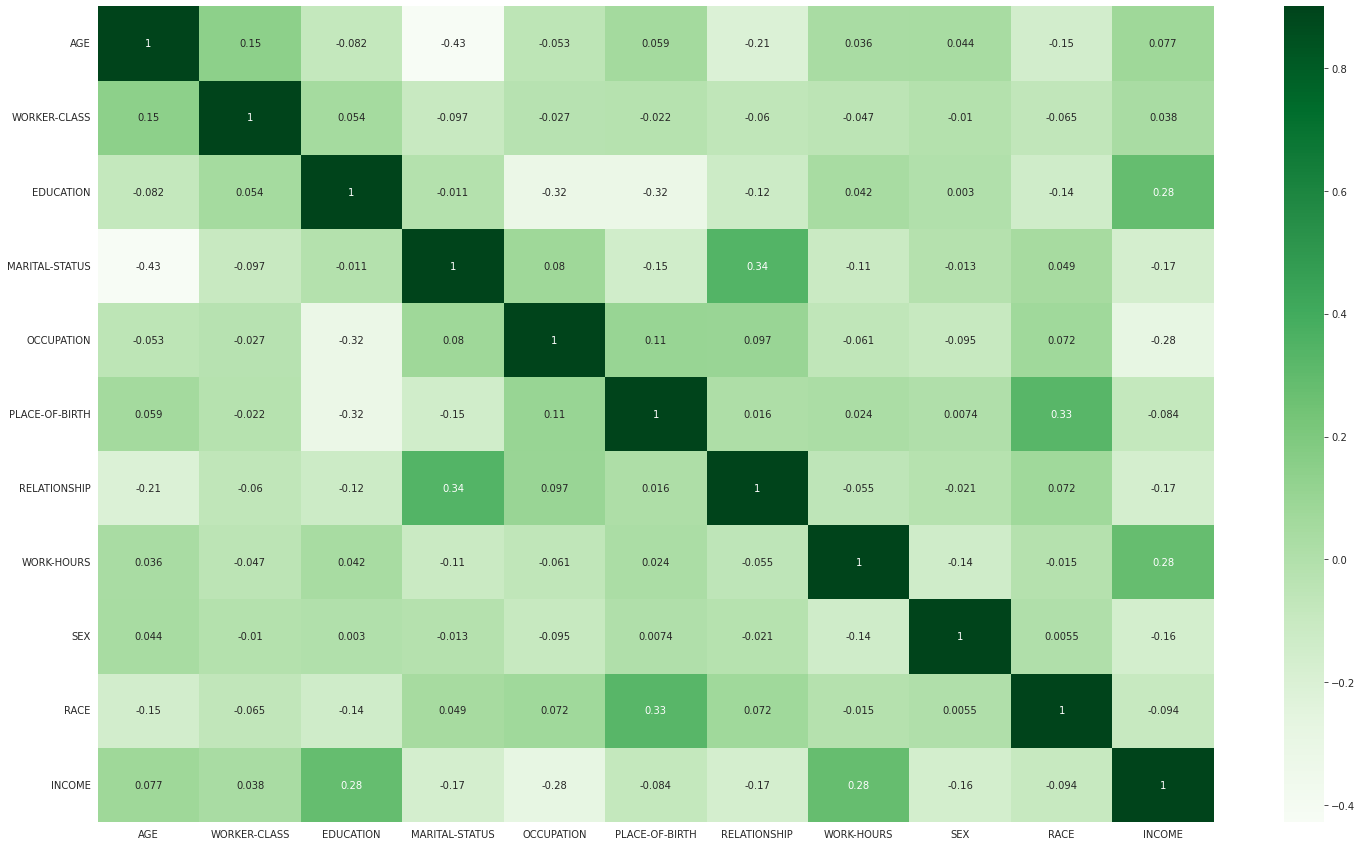

In [10]:
corr_matrix = normalize_df.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, cmap="Greens")

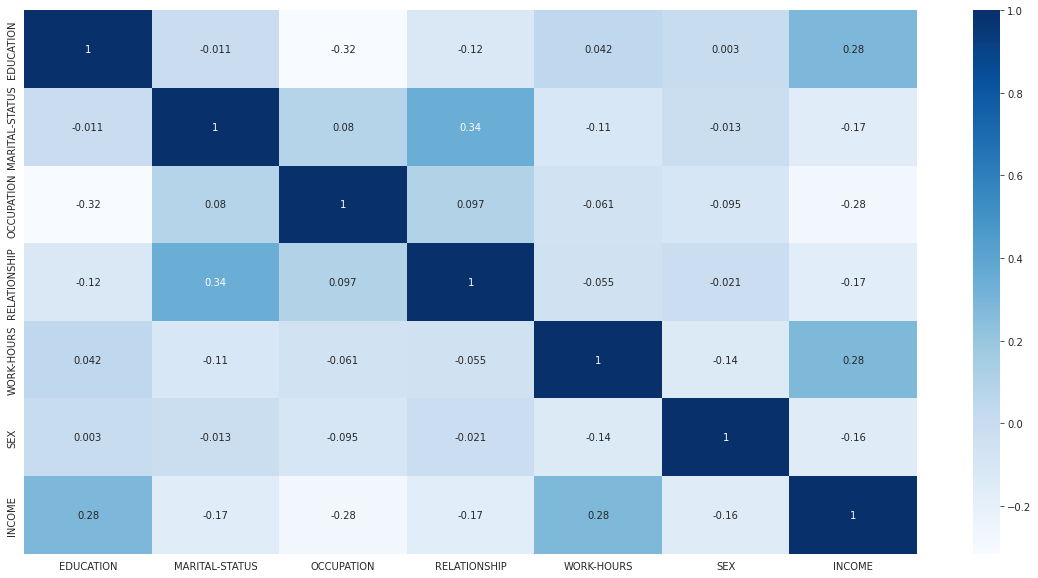

In [11]:
corr_matrix = normalize_df.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["INCOME"])>=0.1]
plt.figure(figsize=(20,10))

g = sns.heatmap(normalize_df[top_corr_features].corr(),
                annot=True,
                cmap="Blues")

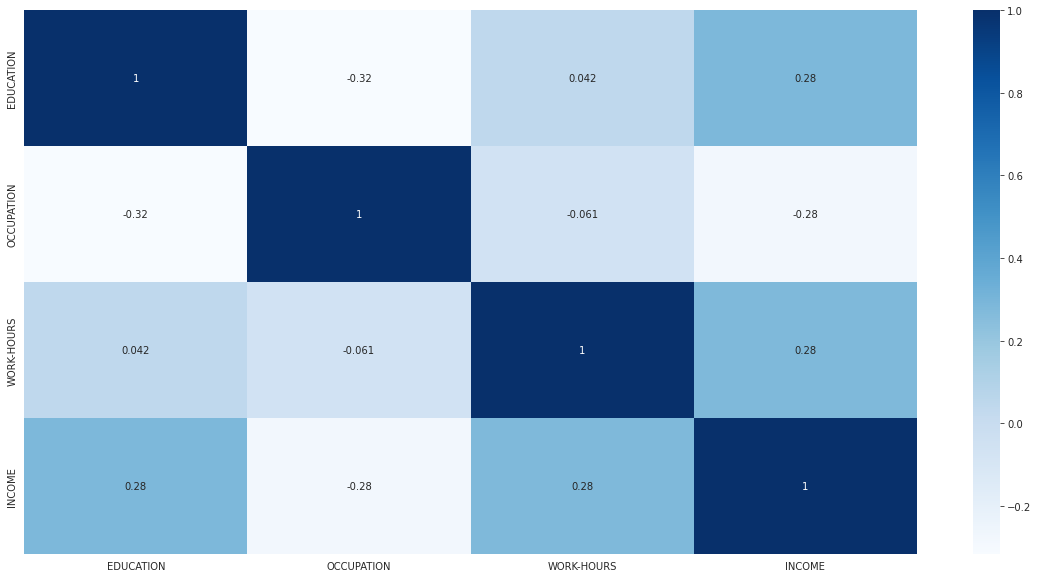

In [12]:
corr_matrix = normalize_df.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["INCOME"])>=0.2]
plt.figure(figsize=(20,10))

g = sns.heatmap(normalize_df[top_corr_features].corr(),
                annot=True,
                cmap="Blues")

In [13]:
data1.columns

Index(['AGE', 'WORKER-CLASS', 'EDUCATION', 'MARITAL-STATUS', 'OCCUPATION',
       'PLACE-OF-BIRTH', 'RELATIONSHIP', 'WORK-HOURS', 'SEX', 'RACE',
       'INCOME'],
      dtype='object')

In [14]:
#data.drop(['AGE', 'WORKER-CLASS', 'MARITAL-STATUS', 'PLACE-OF-BIRTH', 'RELATIONSHIP', 'SEX', 'RACE'], axis = 1, inplace = True)

normalize_df.drop(['AGE', 'WORKER-CLASS', 'PLACE-OF-BIRTH', 'RACE'], axis = 1, inplace = True)

In [15]:
normalize_df.head()


,EDUCATION,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,WORK-HOURS,SEX,INCOME
0,-0.8,0.0,0.00000,0.0,0.000000,0.0,-0.416510
1,0.6,1.0,0.00000,-0.5,0.000000,0.0,0.587242
2,0.4,0.5,0.00000,2.5,0.000000,-1.0,-0.360225
3,0.4,0.0,-1.71337,0.0,11.229178,-1.0,8.686679
4,-0.6,0.0,0.00000,4.5,0.000000,0.0,-0.562852


In [16]:
normalize_df.shape

(275039, 7)

In [17]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(normalize_df,test_size=0.3,random_state=0)
    
train_X=train[train.columns[:6]].to_numpy()
train_Y=train[train.columns[6:]].to_numpy().ravel()
test_X=test[test.columns[:6]].to_numpy()
test_Y=test[test.columns[6:]].to_numpy().ravel()


In [18]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape )

(192527, 6) (192527,) (82512, 6) (82512,)


In [19]:
print(train_Y)

[ 0.08818011  0.33771107 -0.56285178 ...  0.75046904 -0.01125704
 -0.5065666 ]


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

rf = RandomForestRegressor(n_estimators=100)
rf.fit(train_X, train_Y)

y_pred_train = rf.predict(train_X)
y_pred = rf.predict(test_X)

mse_train = mean_squared_error(train_Y, y_pred_train)
rmse_train = math.sqrt(mse_train)
mae_train = mean_absolute_error(train_Y, y_pred_train)
r2_train = r2_score(train_Y, y_pred_train)

mse = mean_squared_error(test_Y, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print(f"[Training set] MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R^2: {r2_train:.4f}\n",
      f"[Testing set] MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

[Training set] MSE: 0.6824, RMSE: 0.8261, MAE: 0.3865, R^2: 0.6332
 [Testing set] MSE: 1.2193, RMSE: 1.1042, MAE: 0.5516, R^2: 0.3283


In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

rf = linear_model.Lars(n_nonzero_coefs=1, normalize=True)
rf.fit(train_X, train_Y)

y_pred_train = rf.predict(train_X)
y_pred = rf.predict(test_X)

mse_train = mean_squared_error(train_Y, y_pred_train)
rmse_train = math.sqrt(mse_train)
mae_train = mean_absolute_error(train_Y, y_pred_train)
r2_train = r2_score(train_Y, y_pred_train)

mse = mean_squared_error(test_Y, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print(f"[Training set] MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R^2: {r2_train:.4f}\n",
      f"[Testing set] MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

[Training set] MSE: 1.8591, RMSE: 1.3635, MAE: 0.8143, R^2: 0.0008
 [Testing set] MSE: 1.8136, RMSE: 1.3467, MAE: 0.8121, R^2: 0.0008


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

rf = DecisionTreeRegressor(max_depth = 2, random_state = 0)
rf.fit(train_X, train_Y)

y_pred_train = rf.predict(train_X)
y_pred = rf.predict(test_X)

mse_train = mean_squared_error(train_Y, y_pred_train)
rmse_train = math.sqrt(mse_train)
mae_train = mean_absolute_error(train_Y, y_pred_train)
r2_train = r2_score(train_Y, y_pred_train)

mse = mean_squared_error(test_Y, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print(f"[Training set] MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R^2: {r2_train:.4f}\n",
      f"[Testing set] MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

[Training set] MSE: 1.4817, RMSE: 1.2173, MAE: 0.6609, R^2: 0.2036
 [Testing set] MSE: 1.4451, RMSE: 1.2021, MAE: 0.6592, R^2: 0.2039


In [23]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


rf = HistGradientBoostingRegressor()
rf.fit(train_X, train_Y)

y_pred_train = rf.predict(train_X)
y_pred = rf.predict(test_X)

mse_train = mean_squared_error(train_Y, y_pred_train)
rmse_train = math.sqrt(mse_train)
mae_train = mean_absolute_error(train_Y, y_pred_train)
r2_train = r2_score(train_Y, y_pred_train)

mse = mean_squared_error(test_Y, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print(f"[Training set] MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R^2: {r2_train:.4f}\n",
      f"[Testing set] MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

[Training set] MSE: 1.0754, RMSE: 1.0370, MAE: 0.5152, R^2: 0.4220
 [Testing set] MSE: 1.0667, RMSE: 1.0328, MAE: 0.5159, R^2: 0.4123


In [24]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
rf = ereg.fit(train_X, train_Y)

y_pred_train = rf.predict(train_X)
y_pred = rf.predict(test_X)

mse_train = mean_squared_error(train_Y, y_pred_train)
rmse_train = math.sqrt(mse_train)
mae_train = mean_absolute_error(train_Y, y_pred_train)
r2_train = r2_score(train_Y, y_pred_train)

mse = mean_squared_error(test_Y, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print(f"[Training set] MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R^2: {r2_train:.4f}\n",
      f"[Testing set] MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

[Training set] MSE: 0.9548, RMSE: 0.9772, MAE: 0.5024, R^2: 0.4868
 [Testing set] MSE: 1.1224, RMSE: 1.0594, MAE: 0.5496, R^2: 0.3816
